In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
cols = []
for x in range(1, 979):
    cols.append(x)

data = pd.read_csv('/Users/mtjen/Desktop/313/data/GeneExpression.csv', header = None)
data.columns = cols
data.head()

,1,2,3,4,5,6,7,8,9,10,...,969,970,971,972,973,974,975,976,977,978
0,0.44,-0.25,-0.94,0.07,0.52,0.62,0.16,-0.76,-0.35,-0.30,...,0.79,0.03,0.32,0.75,-0.25,-0.82,0.39,2.53,0.50,0.25
1,-0.34,-0.45,0.67,-0.02,-0.58,0.21,-0.63,-0.02,-0.70,0.50,...,0.51,-0.23,0.42,0.35,-0.65,-0.05,-0.26,-0.54,-0.58,-0.08
2,-0.10,-0.15,-0.23,0.09,0.57,-0.26,-0.41,-0.69,-1.36,0.70,...,1.81,0.57,0.42,-0.16,0.02,-0.31,0.44,0.03,2.38,-0.33
3,-0.94,0.30,0.18,0.48,-0.06,-0.82,0.40,-0.44,0.18,0.05,...,-0.24,0.60,0.70,-0.48,0.03,-0.99,-1.18,0.17,-1.09,0.62
4,1.20,-0.75,-0.56,-0.17,-0.08,0.43,0.48,-0.48,-0.35,0.52,...,0.15,0.26,-0.42,-0.76,0.59,-0.50,0.92,0.34,0.41,0.86


# Part A

In [3]:
firstTen = data[:10]
firstTen

,1,2,3,4,5,6,7,8,9,10,...,969,970,971,972,973,974,975,976,977,978
0,0.44,-0.25,-0.94,0.07,0.52,0.62,0.16,-0.76,-0.35,-0.30,...,0.79,0.03,0.32,0.75,-0.25,-0.82,0.39,2.53,0.50,0.25
1,-0.34,-0.45,0.67,-0.02,-0.58,0.21,-0.63,-0.02,-0.70,0.50,...,0.51,-0.23,0.42,0.35,-0.65,-0.05,-0.26,-0.54,-0.58,-0.08
2,-0.10,-0.15,-0.23,0.09,0.57,-0.26,-0.41,-0.69,-1.36,0.70,...,1.81,0.57,0.42,-0.16,0.02,-0.31,0.44,0.03,2.38,-0.33
3,-0.94,0.30,0.18,0.48,-0.06,-0.82,0.40,-0.44,0.18,0.05,...,-0.24,0.60,0.70,-0.48,0.03,-0.99,-1.18,0.17,-1.09,0.62
4,1.20,-0.75,-0.56,-0.17,-0.08,0.43,0.48,-0.48,-0.35,0.52,...,0.15,0.26,-0.42,-0.76,0.59,-0.50,0.92,0.34,0.41,0.86
5,1.20,0.31,0.37,-0.75,0.02,-0.65,0.83,-1.12,-1.22,-0.17,...,0.14,-0.06,0.64,0.68,0.17,0.95,-0.01,2.41,-0.04,0.20
6,-0.20,-0.62,0.18,-0.86,0.30,-0.22,-0.41,0.17,0.43,0.31,...,0.75,-0.96,-0.29,-0.22,-0.08,-0.30,0.67,0.75,0.16,1.11
7,0.62,-0.17,0.20,-0.42,-0.78,-0.24,-0.75,0.17,-0.13,0.36,...,0.05,-0.46,2.73,0.84,0.10,0.30,-0.31,0.29,-0.19,0.40
8,-0.16,-0.67,0.11,-0.14,-0.24,-0.01,0.62,-0.28,-0.23,-0.41,...,-0.17,0.20,-0.04,-0.57,0.73,-0.33,0.60,0.39,-0.14,0.28
9,-0.28,0.20,-0.57,-0.02,-0.14,-0.72,-0.22,-0.11,-0.41,-0.22,...,0.66,0.15,0.13,-0.01,-0.56,-0.20,0.87,-2.18,-0.14,0.63


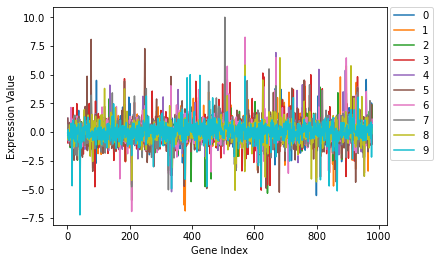

In [4]:
transposed = firstTen.transpose()

plot.plot(transposed)
plot.xlabel('Gene Index')
plot.ylabel('Expression Value')
plot.legend(labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
            loc = 'upper right', bbox_to_anchor = (1.15, 1.025))
plot.show()

# Part B

In [5]:
euclidean = euclidean_distances(data, data)

<AxesSubplot:>

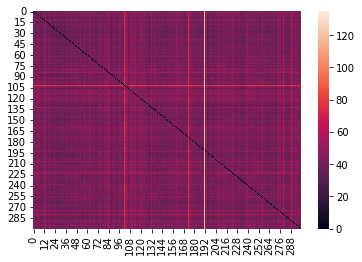

In [6]:
sns.heatmap(euclidean)

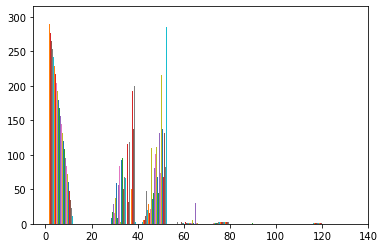

In [7]:
# get upper triangle
upperTri = np.triu(euclidean)

plot.hist(upperTri)
plot.show()

# Part C

In [8]:
correlations = data.transpose().corr()
correlations

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,0.299183,0.343641,0.273834,0.233401,0.404007,0.172397,0.156250,0.275224,0.199170,...,0.125264,0.109923,0.100039,0.181543,0.128257,0.178533,0.084041,0.180097,0.116943,0.165498
1,0.299183,1.000000,0.319324,0.348954,0.126037,0.390579,0.187316,0.159742,0.220444,0.203702,...,0.156337,0.066422,0.088077,0.053973,0.131089,0.207747,0.116441,0.235562,0.102836,0.107334
2,0.343641,0.319324,1.000000,0.296509,0.245744,0.407997,0.173480,0.251147,0.230088,0.224303,...,0.102489,0.100092,0.091492,0.084582,0.084172,0.171268,0.101425,0.152086,0.064845,0.184039
3,0.273834,0.348954,0.296509,1.000000,0.125996,0.354587,0.175935,0.196958,0.315125,0.214321,...,0.157836,0.116646,0.063833,0.094145,0.108735,0.156775,0.144275,0.131699,0.111544,0.086287
4,0.233401,0.126037,0.245744,0.125996,1.000000,0.195079,0.282800,0.245528,0.287299,0.052030,...,-0.033976,0.030873,0.079066,0.047130,-0.103273,-0.028584,0.001204,-0.029356,-0.039032,-0.032298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.178533,0.207747,0.171268,0.156775,-0.028584,0.197615,0.018405,-0.092806,0.044263,0.057985,...,0.264671,0.196017,-0.045993,0.222600,0.395916,1.000000,0.304565,0.498445,0.335798,0.226690
296,0.084041,0.116441,0.101425,0.144275,0.001204,0.119128,-0.057315,0.029277,0.057402,0.059234,...,0.337847,0.204661,0.125146,0.221734,0.260950,0.304565,1.000000,0.315061,0.364044,0.167983
297,0.180097,0.235562,0.152086,0.131699,-0.029356,0.197627,-0.040501,-0.054493,0.017555,0.053344,...,0.297925,0.226310,0.056081,0.214281,0.401112,0.498445,0.315061,1.000000,0.348466,0.288515
298,0.116943,0.102836,0.064845,0.111544,-0.039032,0.092418,-0.052350,-0.116202,-0.030336,0.054671,...,0.277435,0.193220,0.083332,0.136053,0.309058,0.335798,0.364044,0.348466,1.000000,0.155275


In [9]:
distances = correlations

for rowIndex in range(300):
    for colIndex in range(300):
        value = distances.iloc[rowIndex, colIndex]
        distance = 1 - value
        distances.iloc[rowIndex, colIndex] = distance
        
distances

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.700817,0.656359,0.726166,0.766599,0.595993,0.827603,0.843750,0.724776,0.800830,...,0.874736,0.890077,0.899961,0.818457,0.871743,0.821467,0.915959,0.819903,0.883057,0.834502
1,0.700817,0.000000,0.680676,0.651046,0.873963,0.609421,0.812684,0.840258,0.779556,0.796298,...,0.843663,0.933578,0.911923,0.946027,0.868911,0.792253,0.883559,0.764438,0.897164,0.892666
2,0.656359,0.680676,0.000000,0.703491,0.754256,0.592003,0.826520,0.748853,0.769912,0.775697,...,0.897511,0.899908,0.908508,0.915418,0.915828,0.828732,0.898575,0.847914,0.935155,0.815961
3,0.726166,0.651046,0.703491,0.000000,0.874004,0.645413,0.824065,0.803042,0.684875,0.785679,...,0.842164,0.883354,0.936167,0.905855,0.891265,0.843225,0.855725,0.868301,0.888456,0.913713
4,0.766599,0.873963,0.754256,0.874004,0.000000,0.804921,0.717200,0.754472,0.712701,0.947970,...,1.033976,0.969127,0.920934,0.952870,1.103273,1.028584,0.998796,1.029356,1.039032,1.032298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.821467,0.792253,0.828732,0.843225,1.028584,0.802385,0.981595,1.092806,0.955737,0.942015,...,0.735329,0.803983,1.045993,0.777400,0.604084,0.000000,0.695435,0.501555,0.664202,0.773310
296,0.915959,0.883559,0.898575,0.855725,0.998796,0.880872,1.057315,0.970723,0.942598,0.940766,...,0.662153,0.795339,0.874854,0.778266,0.739050,0.695435,0.000000,0.684939,0.635956,0.832017
297,0.819903,0.764438,0.847914,0.868301,1.029356,0.802373,1.040501,1.054493,0.982445,0.946656,...,0.702075,0.773690,0.943919,0.785719,0.598888,0.501555,0.684939,0.000000,0.651534,0.711485
298,0.883057,0.897164,0.935155,0.888456,1.039032,0.907582,1.052350,1.116202,1.030336,0.945329,...,0.722565,0.806780,0.916668,0.863947,0.690942,0.664202,0.635956,0.651534,0.000000,0.844725


<AxesSubplot:>

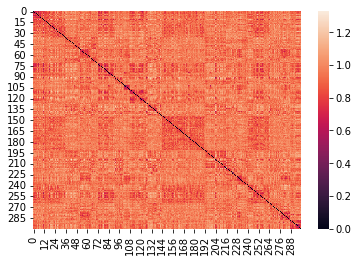

In [10]:
sns.heatmap(distances)

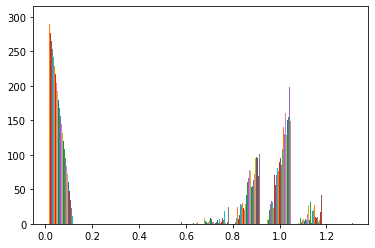

In [11]:
# get upper triangle
upperTriDist = np.triu(distances)

plot.hist(upperTriDist)
plot.show()

# Part D

In [12]:
clusters = KMeans(n_clusters = 10).fit(data)

In [13]:
clusters.labels_

array([6, 6, 6, 6, 3, 6, 8, 8, 8, 8, 8, 0, 8, 8, 8, 8, 8, 0, 0, 8, 3, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 5, 1, 2, 1, 2, 2, 1, 1, 1, 1, 5, 1, 5, 3,
       3, 3, 3, 3, 3, 3, 6, 6, 6, 8, 0, 3, 3, 0, 0, 8, 3, 0, 7, 8, 8, 8,
       8, 0, 8, 4, 5, 3, 5, 3, 3, 5, 5, 3, 3, 3, 7, 1, 1, 1, 1, 1, 6, 6,
       6, 6, 0, 0, 2, 0, 8, 8, 0, 0, 4, 6, 6, 6, 3, 3, 4, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 3, 3, 4, 3, 3, 5, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 0, 8, 8, 3, 8, 8, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 3, 8,
       8, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 8, 8, 9, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 5, 3, 3, 3, 3, 3, 2, 2, 5, 2, 5, 3,
       5, 3, 2, 2, 2, 5, 4, 3, 1, 1, 1, 5, 1, 5, 3, 3, 3, 3, 3, 3, 8, 8,
       3, 3, 8, 8, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8,
       4, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4], d

### Cluster Membership

In [14]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []
cluster8 = []
cluster9 = []

for index in range(300):
    cluster = clusters.labels_[index]
    if cluster == 0:
        cluster0.append(index)
    if cluster == 1:
        cluster1.append(index)
    if cluster == 2:
        cluster2.append(index)
    if cluster == 3:
        cluster3.append(index)
    if cluster == 4:
        cluster4.append(index)
    if cluster == 5:
        cluster5.append(index)
    if cluster == 6:
        cluster6.append(index)
    if cluster == 7:
        cluster7.append(index)
    if cluster == 8:
        cluster8.append(index)
    if cluster == 9:
        cluster9.append(index)

In [15]:
clusterGroups = [cluster0, cluster1, cluster2, cluster3, cluster4, cluster5, cluster6,
                 cluster7, cluster8, cluster9]

for index in range(10):
    group = clusterGroups[index]
    print('Cluster {0}: {1}'.format(index, group))
    print()

Cluster 0: [11, 17, 18, 76, 79, 80, 83, 89, 112, 113, 115, 118, 119, 155, 251, 254, 255, 256]

Cluster 1: [53, 55, 58, 59, 60, 61, 63, 103, 104, 105, 106, 107, 228, 229, 230, 232, 269, 273, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 287]

Cluster 2: [54, 56, 57, 114, 132, 133, 134, 214, 215, 217, 222, 223, 224]

Cluster 3: [4, 20, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 65, 66, 67, 68, 69, 70, 71, 77, 78, 82, 93, 95, 96, 99, 100, 101, 124, 125, 127, 128, 129, 130, 131, 135, 136, 137, 139, 140, 142, 143, 158, 162, 174, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 206, 207, 209, 210, 211, 212, 213, 219, 221, 227, 234, 235, 236, 237, 238, 239, 242, 243, 265, 266, 267, 268, 270, 271, 272, 274, 292]

Cluster 4: [91, 120, 126, 138, 204, 205, 226, 264, 275, 280, 288, 289, 290, 291, 293, 294, 295, 296, 297, 298, 299]

Cluster 5: [52, 62, 64, 92, 94, 97, 98, 141, 208, 216, 218, 220, 225, 231, 233]

Cluster 6: [0, 1, 2, 3, 5, 72, 73, 74, 108, 109, 11

### Final Sum of Square Error

In [16]:
clusters.inertia_

242556.8273543196

### Most Cohesive Cluster

In [17]:
cluster0

[11,
 17,
 18,
 76,
 79,
 80,
 83,
 89,
 112,
 113,
 115,
 118,
 119,
 155,
 251,
 254,
 255,
 256]

In [18]:
centerVals = clusters.cluster_centers_[0]

clusterDistances = []

for index in cluster0:
    for colIndex in range(978):
        geneValue = data.iloc[index, colIndex]
        centerValue = centerVals[colIndex]
        # get distance
        distance = abs(geneValue - centerValue)
        clusterDistances.append(distance)
        
np.mean(clusterDistances)

0.649979297634376

In [19]:
meanDistances = []

for index in range(10):
    groupIndices = clusterGroups[index]
    centerVals = clusters.cluster_centers_[index]
    clusterDistances = []
    
    for rowIndex in groupIndices:
        for colIndex in range(978):
            geneValue = data.iloc[rowIndex, colIndex]
            centerValue = centerVals[colIndex]
            # get distance
            distance = abs(geneValue - centerValue)
            clusterDistances.append(distance)
            
    meanDist = np.mean(clusterDistances)
    meanDistances.append(meanDist)
    
meanDistances

[0.649979297634376,
 0.6020932330534542,
 0.6967967473772099,
 0.6022727410437022,
 0.6608895009946718,
 0.6104958872983413,
 0.6184267158742331,
 0.9847102931152011,
 0.6092064463002719,
 1.0149373956584142e-17]

In [20]:
# most cohesive cluster is cluster9

In [21]:
cluster9

[191]

In [22]:
data[191:192]

,1,2,3,4,5,6,7,8,9,10,...,969,970,971,972,973,974,975,976,977,978
191,-0.76,10.0,-9.32,1.43,3.07,1.55,2.56,0.88,0.9,-0.67,...,2.33,0.67,3.74,-0.49,-5.5,-3.53,-0.89,-1.61,2.48,-0.92


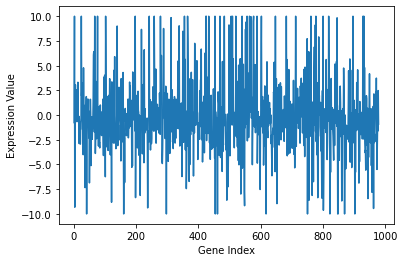

In [23]:
transposed = data[191:192].transpose()

plot.plot(transposed)
plot.xlabel('Gene Index')
plot.ylabel('Expression Value')
plot.show()

# Part E

In [24]:
sseVals = []
aicVals = []
bicVals = []
count = 0

for numClusters in range(2, 31):
    clusters = KMeans(n_clusters = numClusters).fit(data)
    gauss = GaussianMixture(n_components = numClusters, init_params = 'kmeans').fit(data)
    sse = clusters.inertia_
    aic = gauss.aic(data)
    bic = gauss.bic(data)
    
    sseVals.append(sse)
    aicVals.append(aic)
    bicVals.append(bic)
    
    count += 1
    if count == 7:
        print('7 of 29 Done')
    if count == 14:
        print('14 of 29 Done')
    if count == 21:
        print('21 of 29 Done')
    if count == 28:
        print('28 of 29 Done')

7 of 29 Done
14 of 29 Done
21 of 29 Done
28 of 29 Done


### Visualization

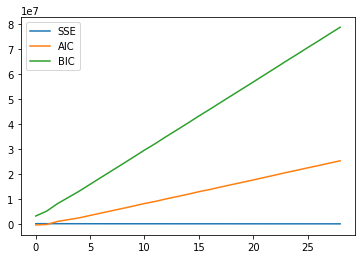

In [25]:
plot.plot(sseVals, label = 'SSE')
plot.plot(aicVals, label = 'AIC')
plot.plot(bicVals, label = 'BIC')
plot.legend()
plot.show()

### Minimum AIC and BIC Clusters

In [26]:
minAic = min(aicVals)
for index in range(29):
    if aicVals[index] == minAic:
        k = index + 2
        print(k)

2


In [27]:
minBic = min(bicVals)
for index in range(29):
    if bicVals[index] == minBic:
        k = index + 2
        print(k)

2


# Part F

In [28]:
distances

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.700817,0.656359,0.726166,0.766599,0.595993,0.827603,0.843750,0.724776,0.800830,...,0.874736,0.890077,0.899961,0.818457,0.871743,0.821467,0.915959,0.819903,0.883057,0.834502
1,0.700817,0.000000,0.680676,0.651046,0.873963,0.609421,0.812684,0.840258,0.779556,0.796298,...,0.843663,0.933578,0.911923,0.946027,0.868911,0.792253,0.883559,0.764438,0.897164,0.892666
2,0.656359,0.680676,0.000000,0.703491,0.754256,0.592003,0.826520,0.748853,0.769912,0.775697,...,0.897511,0.899908,0.908508,0.915418,0.915828,0.828732,0.898575,0.847914,0.935155,0.815961
3,0.726166,0.651046,0.703491,0.000000,0.874004,0.645413,0.824065,0.803042,0.684875,0.785679,...,0.842164,0.883354,0.936167,0.905855,0.891265,0.843225,0.855725,0.868301,0.888456,0.913713
4,0.766599,0.873963,0.754256,0.874004,0.000000,0.804921,0.717200,0.754472,0.712701,0.947970,...,1.033976,0.969127,0.920934,0.952870,1.103273,1.028584,0.998796,1.029356,1.039032,1.032298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.821467,0.792253,0.828732,0.843225,1.028584,0.802385,0.981595,1.092806,0.955737,0.942015,...,0.735329,0.803983,1.045993,0.777400,0.604084,0.000000,0.695435,0.501555,0.664202,0.773310
296,0.915959,0.883559,0.898575,0.855725,0.998796,0.880872,1.057315,0.970723,0.942598,0.940766,...,0.662153,0.795339,0.874854,0.778266,0.739050,0.695435,0.000000,0.684939,0.635956,0.832017
297,0.819903,0.764438,0.847914,0.868301,1.029356,0.802373,1.040501,1.054493,0.982445,0.946656,...,0.702075,0.773690,0.943919,0.785719,0.598888,0.501555,0.684939,0.000000,0.651534,0.711485
298,0.883057,0.897164,0.935155,0.888456,1.039032,0.907582,1.052350,1.116202,1.030336,0.945329,...,0.722565,0.806780,0.916668,0.863947,0.690942,0.664202,0.635956,0.651534,0.000000,0.844725


### Single Link

/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/mtjen/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


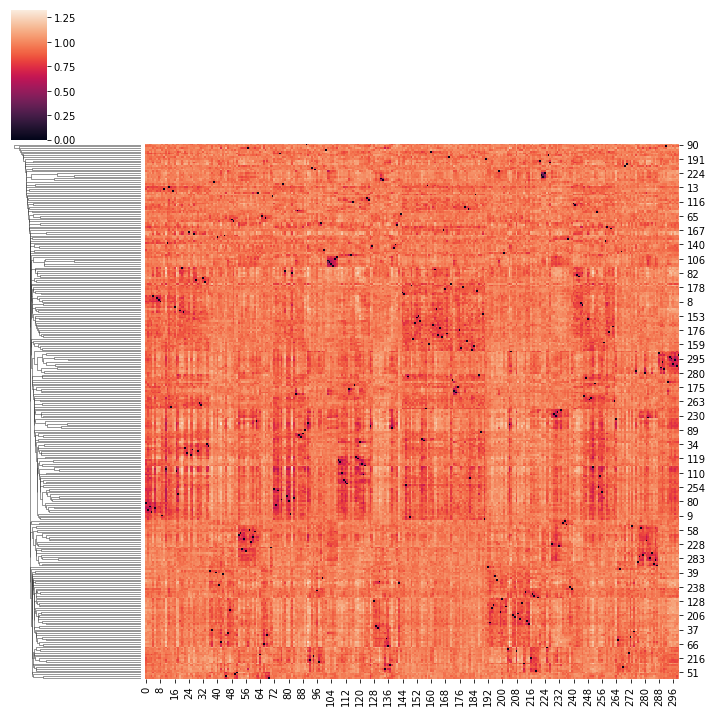

In [29]:
sns.clustermap(distances, method = 'single', col_cluster = False)

### Complete Link

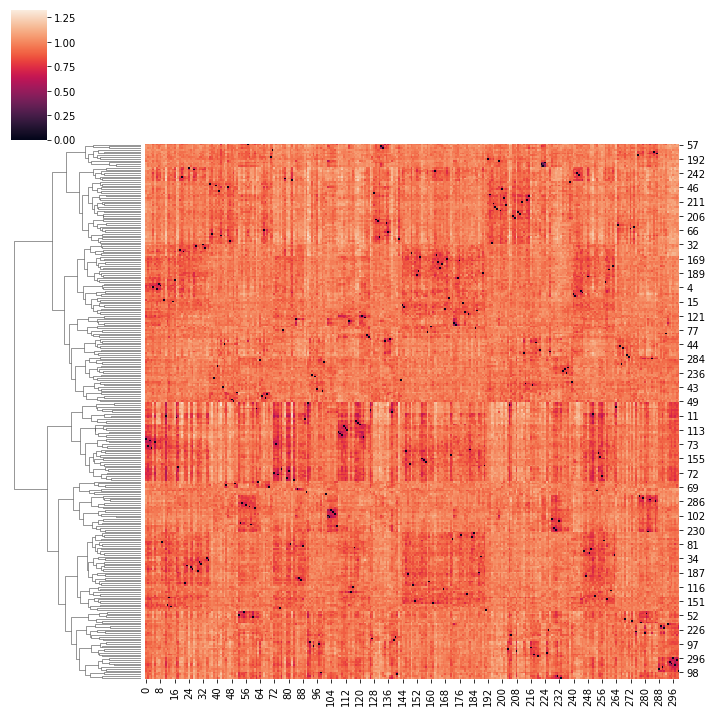

In [30]:
sns.clustermap(distances, method = 'complete', col_cluster = False)

### Average Link

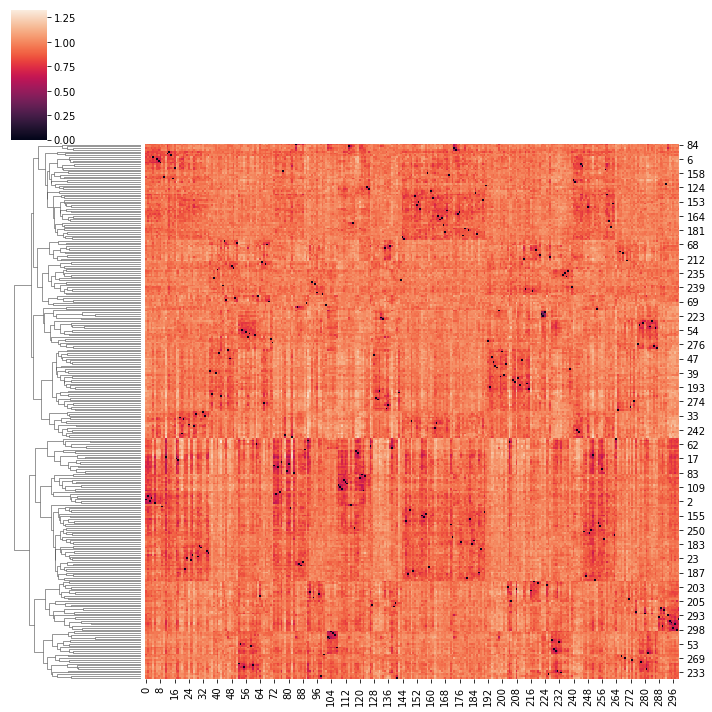

In [31]:
sns.clustermap(distances, method = 'average', col_cluster = False)

# Part G - Bonus

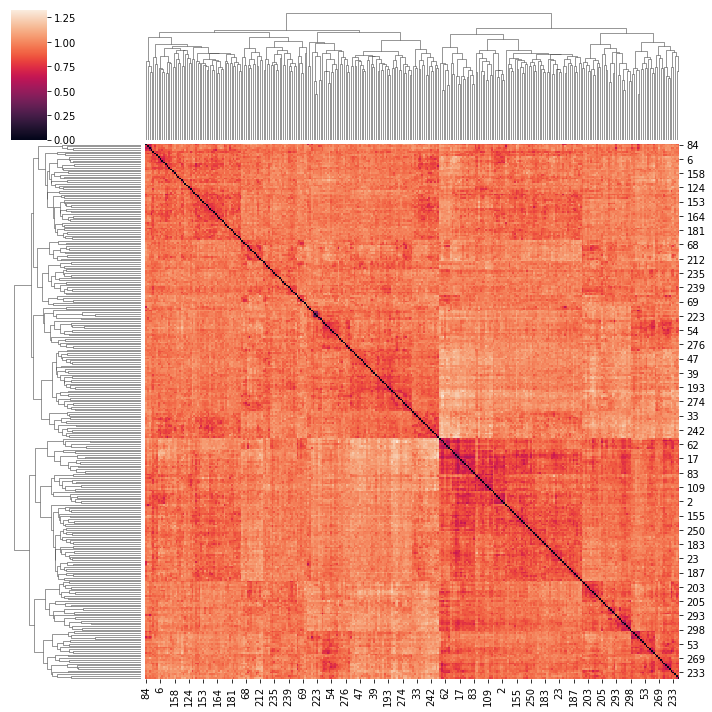

In [32]:
sns.clustermap(distances, method = 'average')